This is exploring data set to understand customer behaviour

Import data files into your code as follows


In [173]:
import pandas as pd
import datetime
customer = pd.read_csv("C://Users//Prisca//Documents//ibm//customer.csv")
customer.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [127]:
Product = pd.read_csv("C://Users//Prisca//Documents//ibm//Product.csv",sep ='|')
Product.head()


,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [174]:
Transaction = pd.read_csv("C://Users//Prisca//Documents//ibm//Transaction.csv",sep = "|")
Transaction.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


Look through the dataset to note the contents 

In [129]:
customer.shape

(500, 9)

In [130]:
Product.shape

(30, 3)

In [131]:
Transaction .shape

(10000, 6)

In [132]:
customer.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [133]:
customer['INCOME'] = customer['INCOME'].map(lambda x:x.replace('$', ''))

In [134]:
customer['INCOME'] = customer['INCOME'].map(lambda x:int(x.replace(',', '')))

In [135]:
customer.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

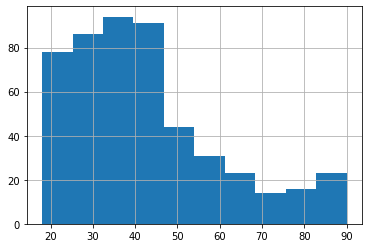

In [175]:
import matplotlib.pyplot as plt
customer['AGE'].hist(bins = 10)
plt.show()

It can be seen here that the modal age range from (30-40)

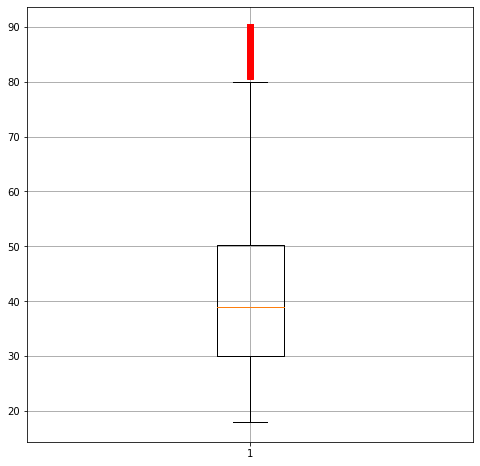

In [137]:
plt.figure(figsize =(8,8))
plt.boxplot(customer['AGE'],0,'rs',1)
plt.grid(linestyle = '-', linewidth = 1)
plt.show()


In [138]:
customer['AGE'].unique()

array([64, 42, 40, 38, 30, 63, 33, 49, 44, 36, 18, 31, 39, 47, 69, 32, 45,
       46, 56, 48, 57, 19, 22, 84, 34, 25, 23, 55, 29, 37, 83, 26, 35, 77,
       24, 88, 70, 41, 53, 21, 67, 28, 78, 43, 85, 20, 89, 52, 27, 62, 59,
       73, 51, 54, 74, 60, 90, 61, 87, 58, 65, 82, 80, 68, 66, 86, 50, 72,
       76, 79, 75, 81], dtype=int64)

In [139]:
TP = Transaction.merge(Product, how ='inner', left_on = 'PRODUCT NUM',right_on='PRODUCT CODE')
TP.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [178]:
TP['TOTAL']= TP['QUANTITY PURCHASED']*TP['UNIT LIST PRICE']*(1- TP['DISCOUNT TAKEN'])
TP.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [142]:
Income_by_product = TP.groupby('PRODUCT CATEGORY').agg('sum').sort_values('TOTAL',ascending = False)
Income_by_product

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,STOCKOUT,PRODUCT CODE,UNIT LIST PRICE,TOTAL
PRODUCT CATEGORY,,,,,,,,
ELECTRONICS,32074818,93990945,32814,202.1,261,93990945,164549.10,1607192.422
APPAREL,40113232,117470878,36568,258.4,280,117470878,107373.40,936757.914
FOOD,17796962,52093433,20144,111.3,171,52093433,9030.83,96044.610
HEALTH & BEAUTY,12526933,36606154,8872,85.2,56,36606154,8121.29,54776.312


In [143]:
revenue_by_product = Income_by_product.rename(columns = {"TOTAL":'revenue per product'})
revenue_by_product


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,STOCKOUT,PRODUCT CODE,UNIT LIST PRICE,revenue per product
PRODUCT CATEGORY,,,,,,,,
ELECTRONICS,32074818,93990945,32814,202.1,261,93990945,164549.10,1607192.422
APPAREL,40113232,117470878,36568,258.4,280,117470878,107373.40,936757.914
FOOD,17796962,52093433,20144,111.3,171,52093433,9030.83,96044.610
HEALTH & BEAUTY,12526933,36606154,8872,85.2,56,36606154,8121.29,54776.312


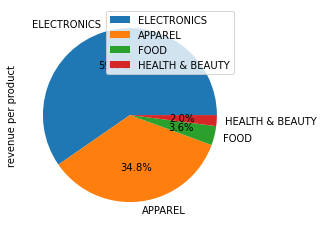

In [180]:
revenue_by_product['revenue per product'].plot(kind = 'pie',autopct = '%1.1f%%',legend = True)

It can be seen by the pie chart that electronics generate the most revenue 

In [149]:
customer_prod = TP.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL':'sum'})
customer_prod.head()

TOTAL
CUSTOMER NUM PRODUCT CATEGORY          
10001        APPAREL           4022.430
             ELECTRONICS       1601.315
             FOOD                68.688
             HEALTH & BEAUTY   1134.337
10002        APPAREL           2312.509

In [150]:
customer_prod.columns

Index(['TOTAL'], dtype='object')

In [155]:
customer_prod.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [ ]:
from datetime import datetime
TP['TRANSACTION DATE'] = pd.to_datetime(TP['TRANSACTION DATE'])#.map(lambda x:datetime.strptime(x,'%m/%d/%Y'))
#type(TP['TRANSACTION DATE'])
TP.dtypes

In [182]:
recent_trans = TP.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE':'max','TOTAL':'sum'}).rename(columns = {'TRANSACTION DATE':'RECENT TRANSACTION DATE','TOTAL': 'TOTAL SPENT'})
recent_trans.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,9/21/2015,6826.770
10002,8/7/2015,5062.451
10003,9/18/2015,8562.440
10004,8/7/2015,5522.694
10005,5/18/2015,213.512


This shows the recent transaction and amount spent